In [3]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker

In [82]:
delta = 0.1

z = 20
m = 1
alpha = 20 /180*np.pi
d = m * z 
s = np.pi * m / 2
d_b = d * np.cos(alpha)
s_b = d_b * (s/d + np.tan(alpha) - alpha)
p_b = np.pi * d_b / z
e_b = p_b - s_b
t = 2 * np.pi / z
d_f = m * (z - 7/3)
print(f"z   = {z}")
print(f"m   = {m}")
print(f"d   = {d}")
print(f"s   = {s}")
print(f"d_b = {d_b}")
print(f"s_b = {s_b}")
print(f"p_b = {p_b}")
print(f"e_b = {e_b}")
print(f"t   = {t}")
print(f"d_f = {d_f}")


x = np.arange(0.0, 30.0, delta)
y = np.arange(0.0, 20.0, delta)
X, Y = np.meshgrid(x, y)

R = (X**2 + Y**2)**0.5 / (d_b/2)

T = R**2 - 1
PHI = T - np.arctan(T)
PHI2 = abs((np.arctan2(Y,X) ) % t - t/2) -t/2 * e_b / p_b
#Z1 = np.exp(-X**2 - Y**2)
#Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
#Z = (Z1 - Z2) * 2
Z = PHI -PHI2

z   = 20
m   = 1
d   = 20
s   = 1.5707963267948966
d_b = 18.79385241571817
s_b = 1.7561765077967066
p_b = 2.952131434093549
e_b = 1.1959549262968425
t   = 0.3141592653589793
d_f = 17.666666666666668


<a list of 6 text.Text objects>

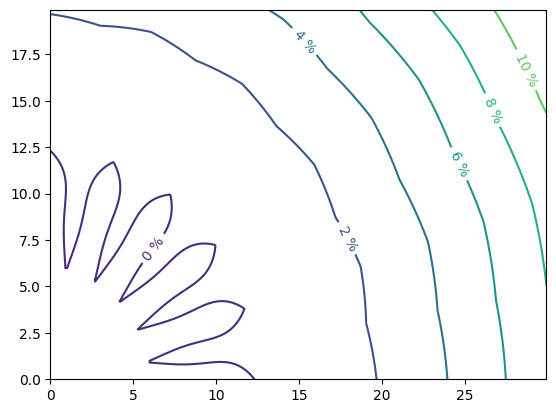

In [83]:
# This custom formatter removes trailing zeros, e.g. "1.0" becomes "1", and
# then adds a percent sign.
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"


# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

ax.clabel(CS, CS.levels, fmt=fmt, fontsize=10)